In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_excel('students_performance_dataset.xlsx')
df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,S1295,Female,37.889943,93.974474,73.110423,Postgraduate,No,20958.572001,No,No,Yes,Public,9.500750,1.595412,4.361682,6.370988,Average,8.244674,9,59.557187
296,S1296,Female,39.440043,63.033473,46.307163,High School,No,53041.062074,Yes,No,No,Private,8.323931,1.443552,3.443489,5.514181,Good,1.471522,2,37.345842
297,S1297,Male,30.135127,72.613172,31.708055,High School,Yes,55549.679936,No,No,No,Private,6.408674,0.231670,3.086052,9.785683,Poor,2.436624,9,34.668326
298,S1298,Male,15.050383,94.388327,90.906921,Graduate,No,30929.622253,Yes,No,No,Public,4.951745,0.941085,3.867481,7.151084,Average,4.020609,6,58.143709


In [3]:
print("Information:")
df.info()
print("Shape:")
df.shape

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300 n

(300, 20)

In [4]:
print("Summary:")
df.describe()

Summary:


,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Final_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.273491,69.601451,64.102933,54518.876589,6.993096,1.670011,5.468870,5.763599,5.402980,4.436667,41.454265
std,11.844562,17.480853,20.456827,24845.101039,1.734910,0.840759,2.559495,2.476379,2.588179,2.751586,9.989541
min,0.202463,40.681219,30.324242,10111.301178,4.012623,0.101284,1.018167,1.048115,1.045239,0.000000,17.916539
25%,9.871826,54.364955,45.966283,32842.034240,5.450614,0.953231,3.226739,4.106060,3.147787,2.000000,34.401047
50%,21.528196,69.299178,64.715015,56120.473769,7.144770,1.735533,5.536846,5.873572,5.171520,4.000000,41.596899
75%,30.146774,84.850333,81.261818,74997.618701,8.417073,2.436196,7.683439,7.751822,7.758593,7.000000,48.210497
max,39.620206,99.983060,99.781198,99593.244163,9.998283,2.998452,9.995895,9.902960,9.978605,9.000000,67.295712


In [5]:
df.isnull().sum()

Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64

# No Missing Values #

In [6]:
features_df = df.drop('Final_Score', axis=1)
features_df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,S1295,Female,37.889943,93.974474,73.110423,Postgraduate,No,20958.572001,No,No,Yes,Public,9.500750,1.595412,4.361682,6.370988,Average,8.244674,9
296,S1296,Female,39.440043,63.033473,46.307163,High School,No,53041.062074,Yes,No,No,Private,8.323931,1.443552,3.443489,5.514181,Good,1.471522,2
297,S1297,Male,30.135127,72.613172,31.708055,High School,Yes,55549.679936,No,No,No,Private,6.408674,0.231670,3.086052,9.785683,Poor,2.436624,9
298,S1298,Male,15.050383,94.388327,90.906921,Graduate,No,30929.622253,Yes,No,No,Public,4.951745,0.941085,3.867481,7.151084,Average,4.020609,6


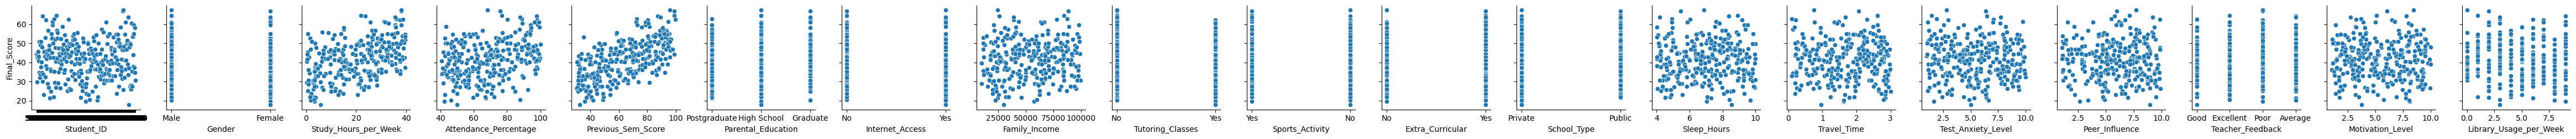

In [7]:
sns.pairplot(df, x_vars=features_df.columns, y_vars='Final_Score')
plt.show()

In [8]:
exclude_cols = ['Student_ID', 'Gender', 'Final_Score']
features = [col for col in df.columns if col not in exclude_cols]
features

['Study_Hours_per_Week',
 'Attendance_Percentage',
 'Previous_Sem_Score',
 'Parental_Education',
 'Internet_Access',
 'Family_Income',
 'Tutoring_Classes',
 'Sports_Activity',
 'Extra_Curricular',
 'School_Type',
 'Sleep_Hours',
 'Travel_Time',
 'Test_Anxiety_Level',
 'Peer_Influence',
 'Teacher_Feedback',
 'Motivation_Level',
 'Library_Usage_per_Week']

In [9]:
le = LabelEncoder()
features_df['Parental_Education_Encoded'] = le.fit_transform(df['Parental_Education'])
features_df['Internet_Access_Encoded'] = le.fit_transform(df['Internet_Access'])
features_df['Tutoring_Classes_Encoded'] = le.fit_transform(df['Tutoring_Classes'])
features_df['Sports_Activity_Encoded'] = le.fit_transform(df['Sports_Activity'])
features_df['Extra_Curricular_Encoded'] = le.fit_transform(df['Extra_Curricular'])
features_df['School_Type_Encoded'] = le.fit_transform(df['School_Type'])
features_df['Teacher_Feedback_Encoded'] = le.fit_transform(df['Teacher_Feedback'])

features_df = features_df.drop(['Parental_Education', 'Internet_Access', 'Tutoring_Classes', 'Sports_Activity', 'Extra_Curricular', 'School_Type', 'Teacher_Feedback'], axis=1)
features_df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Parental_Education_Encoded,Internet_Access_Encoded,Tutoring_Classes_Encoded,Sports_Activity_Encoded,Extra_Curricular_Encoded,School_Type_Encoded,Teacher_Feedback_Encoded
0,S1000,Male,36.330635,86.628815,38.182863,32727.500387,6.777112,2.488956,4.526416,1.698767,9.416549,4,2,0,0,1,0,0,2
1,S1001,Female,9.582476,73.504255,95.788249,42332.567312,6.631231,2.192993,5.920305,8.459841,4.382245,4,1,0,0,1,0,0,1
2,S1002,Male,5.795795,65.453321,73.939564,44142.273093,5.311059,0.887486,5.788195,4.140011,7.373097,5,1,1,0,0,1,0,1
3,S1003,Male,19.578110,94.381263,53.443393,64498.434188,6.380781,1.267095,6.313880,5.694395,5.281190,6,0,1,0,0,1,0,2
4,S1004,Male,39.426018,46.671849,39.749045,42105.884774,4.266327,0.397970,1.551979,8.150371,7.069597,6,2,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,S1295,Female,37.889943,93.974474,73.110423,20958.572001,9.500750,1.595412,4.361682,6.370988,8.244674,9,2,0,0,0,1,1,0
296,S1296,Female,39.440043,63.033473,46.307163,53041.062074,8.323931,1.443552,3.443489,5.514181,1.471522,2,1,0,1,0,0,0,2
297,S1297,Male,30.135127,72.613172,31.708055,55549.679936,6.408674,0.231670,3.086052,9.785683,2.436624,9,1,1,0,0,0,0,3
298,S1298,Male,15.050383,94.388327,90.906921,30929.622253,4.951745,0.941085,3.867481,7.151084,4.020609,6,0,0,1,0,0,1,0


In [12]:
features_df.drop(['Student_ID', 'Gender'], axis=1, inplace=True)
features_df

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Parental_Education_Encoded,Internet_Access_Encoded,Tutoring_Classes_Encoded,Sports_Activity_Encoded,Extra_Curricular_Encoded,School_Type_Encoded,Teacher_Feedback_Encoded
0,36.330635,86.628815,38.182863,32727.500387,6.777112,2.488956,4.526416,1.698767,9.416549,4,2,0,0,1,0,0,2
1,9.582476,73.504255,95.788249,42332.567312,6.631231,2.192993,5.920305,8.459841,4.382245,4,1,0,0,1,0,0,1
2,5.795795,65.453321,73.939564,44142.273093,5.311059,0.887486,5.788195,4.140011,7.373097,5,1,1,0,0,1,0,1
3,19.578110,94.381263,53.443393,64498.434188,6.380781,1.267095,6.313880,5.694395,5.281190,6,0,1,0,0,1,0,2
4,39.426018,46.671849,39.749045,42105.884774,4.266327,0.397970,1.551979,8.150371,7.069597,6,2,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,37.889943,93.974474,73.110423,20958.572001,9.500750,1.595412,4.361682,6.370988,8.244674,9,2,0,0,0,1,1,0
296,39.440043,63.033473,46.307163,53041.062074,8.323931,1.443552,3.443489,5.514181,1.471522,2,1,0,1,0,0,0,2
297,30.135127,72.613172,31.708055,55549.679936,6.408674,0.231670,3.086052,9.785683,2.436624,9,1,1,0,0,0,0,3
298,15.050383,94.388327,90.906921,30929.622253,4.951745,0.941085,3.867481,7.151084,4.020609,6,0,0,1,0,0,1,0


In [16]:
feature_cols = list(features_df.columns)
feature_cols

['Study_Hours_per_Week',
 'Attendance_Percentage',
 'Previous_Sem_Score',
 'Family_Income',
 'Sleep_Hours',
 'Travel_Time',
 'Test_Anxiety_Level',
 'Peer_Influence',
 'Motivation_Level',
 'Library_Usage_per_Week',
 'Parental_Education_Encoded',
 'Internet_Access_Encoded',
 'Tutoring_Classes_Encoded',
 'Sports_Activity_Encoded',
 'Extra_Curricular_Encoded',
 'School_Type_Encoded',
 'Teacher_Feedback_Encoded']

In [20]:
target = df['Final_Score']
dataframe = features_df
dataframe['Final_Score'] = target

In [31]:
correlations = dataframe[feature_cols + ['Final_Score']].corr()['Final_Score'].sort_values(ascending=False)
print(correlations.head(11)[1:])

Previous_Sem_Score          0.632940
Study_Hours_per_Week        0.464599
Attendance_Percentage       0.335473
Family_Income               0.090093
Teacher_Feedback_Encoded    0.079710
Extra_Curricular_Encoded    0.025958
Sleep_Hours                 0.021040
School_Type_Encoded         0.001950
Internet_Access_Encoded    -0.013847
Sports_Activity_Encoded    -0.017446
Name: Final_Score, dtype: float64


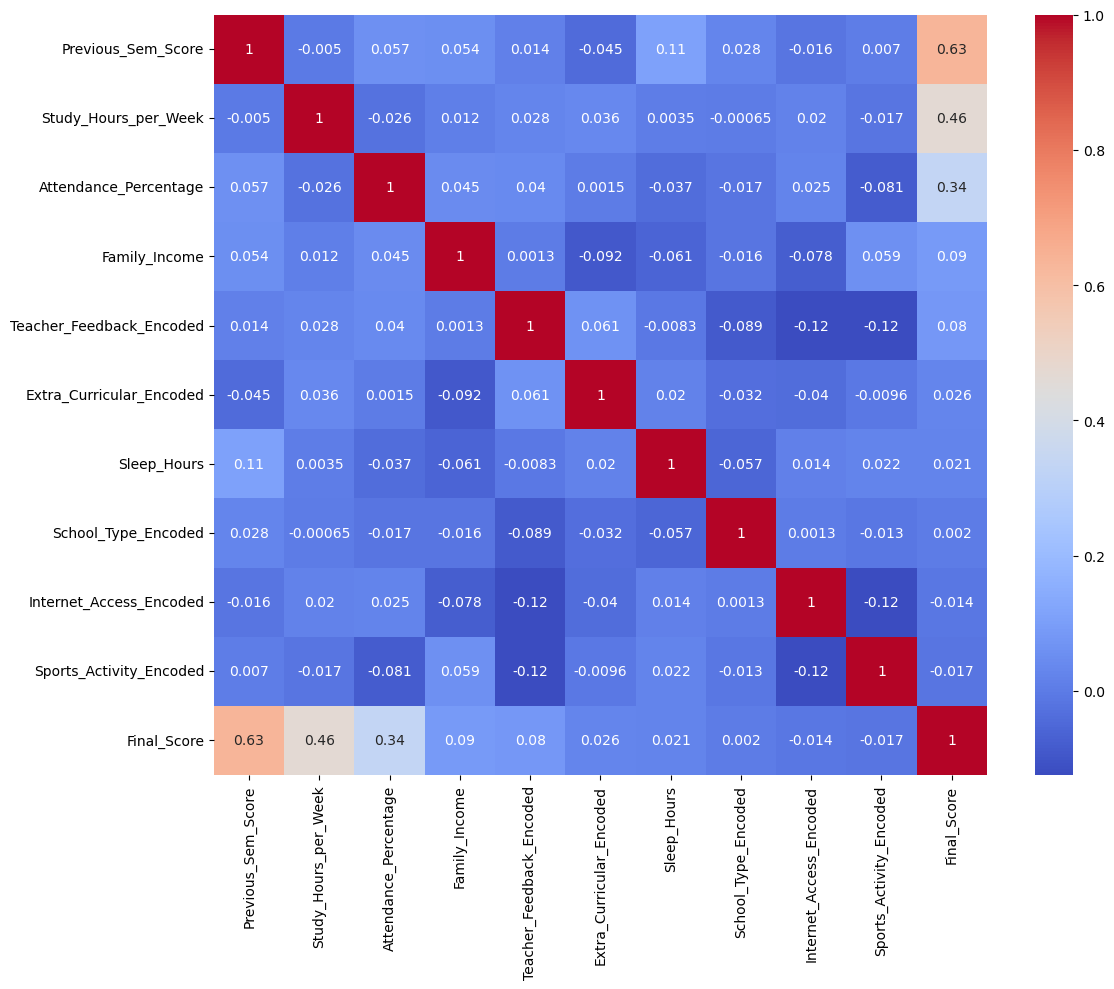

In [47]:
plt.figure(figsize=(12, 10))
important_features = correlations.head(11)[1:].index[:10]
corr_matrix = dataframe[list(important_features) + ['Final_Score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [54]:
X = dataframe[important_features]
y = dataframe['Final_Score']
y

0      44.293533
1      42.749974
2      29.846049
3      44.030395
4      42.548877
         ...    
295    59.557187
296    37.345842
297    34.668326
298    58.143709
299    30.746761
Name: Final_Score, Length: 300, dtype: float64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 10)
(60, 10)
(240,)
(60,)


In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.29421336,  0.42177358, -1.06736812, ..., -1.0168079 ,
        -0.88940698,  1.05131497],
       [-1.27112942, -1.16784504,  0.8329788 , ...,  0.98346994,
        -0.88940698,  1.05131497],
       [ 0.49093445,  0.56844057, -1.61378556, ..., -1.0168079 ,
         1.12434467,  1.05131497],
       ...,
       [-1.53774459,  1.4649556 , -1.19365911, ...,  0.98346994,
         1.12434467, -0.95118973],
       [ 0.75984116,  0.97402804,  1.56122378, ...,  0.98346994,
         1.12434467, -0.95118973],
       [-0.93505459,  1.17626448,  0.2376555 , ...,  0.98346994,
         1.12434467, -0.95118973]])

In [65]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['Previous_Sem_Score', 'Study_Hours_per_Week', 'Attendance_Percentage',
       'Family_Income', 'Teacher_Feedback_Encoded', 'Extra_Curricular_Encoded',
       'Sleep_Hours', 'School_Type_Encoded', 'Internet_Access_Encoded',
       'Sports_Activity_Encoded'],
      dtype='object')


In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [79]:
def check_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    return {'R2' : r2, 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae}

In [80]:
print("Training metrics:")
train_metrics = check_metrics(y_train, y_pred_train)
print(train_metrics)

print("Testing metrics:")
test_metrics = check_metrics(y_test, y_pred_test)
print(test_metrics)

Training metrics:
{'R2': 0.73967253608253, 'MSE': 25.890983243168048, 'RMSE': np.float64(5.088318311895203), 'MAE': 4.105772248364482}
Testing metrics:
{'R2': 0.6116627831399971, 'MSE': 36.4509561501884, 'RMSE': np.float64(6.037462724538214), 'MAE': 5.025075652478517}


In [85]:
print("Overfitting Check:")
print(f"R2 difference (Train - Test): {train_metrics['R2'] - test_metrics['R2']:.4f}")
if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    print("Model appears to generalize well (low overfitting)")
else:
    print("⚠️ Potential overfitting detected")

Overfitting Check:
R2 difference (Train - Test): 0.1280
⚠️ Potential overfitting detected


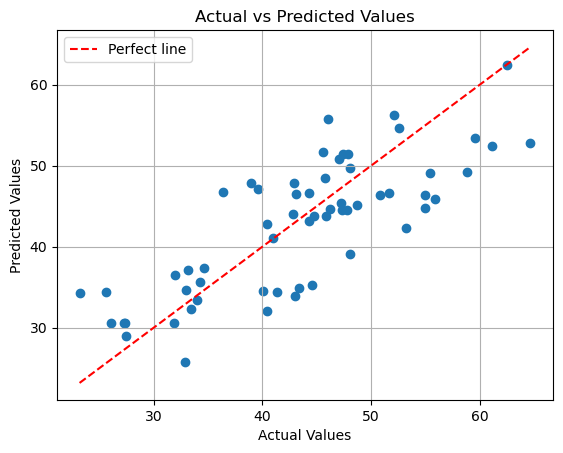

In [93]:
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.legend()
plt.show()